In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
retail = pd.read_csv("online_retail2.csv")
retail = retail.drop_duplicates()
retail = retail.dropna(axis=0,how="any")
retail.info()

#change column format to date
retail.InvoiceDate = pd.to_datetime(retail.InvoiceDate)
retail.InvoiceDate

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: datetime64[ns]

In [3]:
print(retail.InvoiceDate.dt.year)
print(retail.InvoiceDate.dt.month)
print(retail.InvoiceDate.dt.day)

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: InvoiceDate, Length: 797885, dtype: int32
0          12
1          12
2          12
3          12
4          12
           ..
1067366    12
1067367    12
1067368    12
1067369    12
1067370    12
Name: InvoiceDate, Length: 797885, dtype: int32
0          1
1          1
2          1
3          1
4          1
          ..
1067366    9
1067367    9
1067368    9
1067369    9
1067370    9
Name: InvoiceDate, Length: 797885, dtype: int32


In [4]:
#change datetime format
retail.InvoiceDate.dt.strftime("%B %Y")

0          December 2009
1          December 2009
2          December 2009
3          December 2009
4          December 2009
               ...      
1067366    December 2011
1067367    December 2011
1067368    December 2011
1067369    December 2011
1067370    December 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [5]:
retail.InvoiceDate.dt.strftime("%W %Y")

0          48 2009
1          48 2009
2          48 2009
3          48 2009
4          48 2009
            ...   
1067366    49 2011
1067367    49 2011
1067368    49 2011
1067369    49 2011
1067370    49 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [6]:
print(retail.InvoiceDate.max())
print(retail.InvoiceDate.min())

2011-12-09 12:50:00
2009-12-01 07:45:00


In [7]:
#time interval
retail.InvoiceDate.max()-retail.InvoiceDate.min()

Timedelta('738 days 05:05:00')

Recency

In [9]:
max_date = retail.InvoiceDate.max()
last_purchase_date = retail.groupby("Customer ID", as_index=False)["InvoiceDate"].max()

In [10]:
print(max_date)
print(last_purchase_date)

2011-12-09 12:50:00
      Customer ID         InvoiceDate
0         12346.0 2011-01-18 10:17:00
1         12347.0 2011-12-07 15:52:00
2         12348.0 2011-09-25 13:13:00
3         12349.0 2011-11-21 09:51:00
4         12350.0 2011-02-02 16:01:00
...           ...                 ...
5937      18283.0 2011-12-06 12:02:00
5938      18284.0 2010-10-06 12:31:00
5939      18285.0 2010-02-17 10:24:00
5940      18286.0 2010-08-20 11:57:00
5941      18287.0 2011-10-28 09:29:00

[5942 rows x 2 columns]


In [11]:
last_purchase_date["Recency"] = max_date-last_purchase_date["InvoiceDate"]

In [12]:
last_purchase_date["Recency"]

0      325 days 02:33:00
1        1 days 20:58:00
2       74 days 23:37:00
3       18 days 02:59:00
4      309 days 20:49:00
              ...       
5937     3 days 00:48:00
5938   429 days 00:19:00
5939   660 days 02:26:00
5940   476 days 00:53:00
5941    42 days 03:21:00
Name: Recency, Length: 5942, dtype: timedelta64[ns]

In [13]:
last_purchase_date["Recency"].describe()

count                           5942
mean     202 days 10:33:55.930663076
std      211 days 21:00:52.495651984
min                  0 days 00:00:00
25%                 24 days 01:41:45
50%                 95 days 12:20:00
75%                380 days 22:12:00
max                738 days 02:55:00
Name: Recency, dtype: object

In [14]:
last_purchase_date["Recency_Day"] = last_purchase_date["Recency"].dt.components["days"]
last_purchase_date["Recency_Day"]

0       325
1         1
2        74
3        18
4       309
       ... 
5937      3
5938    429
5939    660
5940    476
5941     42
Name: Recency_Day, Length: 5942, dtype: int64

(array([2712.,  597.,  427.,  342.,  253.,  665.,  272.,  244.,  234.,
         196.]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <BarContainer object of 10 artists>)

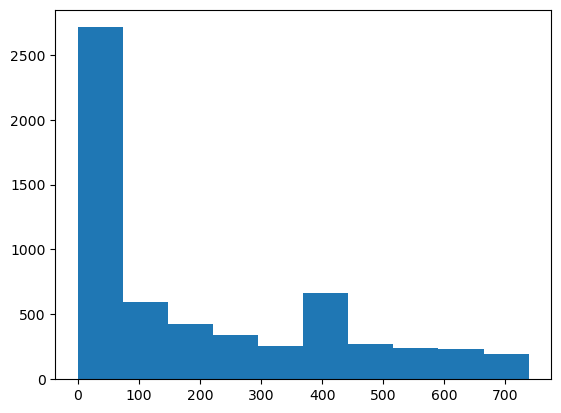

In [15]:
import matplotlib.pyplot as plt
plt.hist(last_purchase_date["Recency_Day"])

In [16]:
customers = np.unique(retail["Customer ID"])
print(customers)
print(customers.shape)

[12346. 12347. 12348. ... 18285. 18286. 18287.]
(5942,)


In [17]:
len(customers)

5942

In [18]:
retail["date"] = retail["InvoiceDate"].dt.strftime("%Y-%m-%d")
retail["date"]

0          2009-12-01
1          2009-12-01
2          2009-12-01
3          2009-12-01
4          2009-12-01
              ...    
1067366    2011-12-09
1067367    2011-12-09
1067368    2011-12-09
1067369    2011-12-09
1067370    2011-12-09
Name: date, Length: 797885, dtype: object

In [19]:
customer_group = retail.groupby(["Customer ID","date"], as_index=False).count()
customer_group

,Customer ID,date,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,12346.0,2009-12-14,3,3,3,3,3,3,3
1,12346.0,2009-12-18,2,2,2,2,2,2,2
2,12346.0,2010-01-04,2,2,2,2,2,2,2
3,12346.0,2010-01-14,1,1,1,1,1,1,1
4,12346.0,2010-01-22,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
38497,18287.0,2010-09-21,21,21,21,21,21,21,21
38498,18287.0,2010-11-22,10,10,10,10,10,10,10
38499,18287.0,2011-05-22,29,29,29,29,29,29,29
38500,18287.0,2011-10-12,38,38,38,38,38,38,38


In [20]:
customer_group = retail.groupby(["Customer ID","date"], as_index=False).count()[["Customer ID","date"]]
customer_group

,Customer ID,date
0,12346.0,2009-12-14
1,12346.0,2009-12-18
2,12346.0,2010-01-04
3,12346.0,2010-01-14
4,12346.0,2010-01-22
...,...,...
38497,18287.0,2010-09-21
38498,18287.0,2010-11-22
38499,18287.0,2011-05-22
38500,18287.0,2011-10-12


In [21]:
inter_data = pd.DataFrame()

In [22]:
for customer in customers:
    c_d = customer_group[customer_group["Customer ID"]==customer]
    c_d["previous_date"]=c_d["date"].shift(1)
    inter_data=pd.concat([inter_data,c_d],axis=0)

C:\Users\thanh\AppData\Local\Temp\ipykernel_9032\394427366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d["previous_date"]=c_d["date"].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_9032\394427366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d["previous_date"]=c_d["date"].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_9032\394427366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [23]:
inter_data

,Customer ID,date,previous_date
0,12346.0,2009-12-14,None
1,12346.0,2009-12-18,2009-12-14
2,12346.0,2010-01-04,2009-12-18
3,12346.0,2010-01-14,2010-01-04
4,12346.0,2010-01-22,2010-01-14
...,...,...,...
38497,18287.0,2010-09-21,2010-05-17
38498,18287.0,2010-11-22,2010-09-21
38499,18287.0,2011-05-22,2010-11-22
38500,18287.0,2011-10-12,2011-05-22


In [24]:
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 0 to 38501
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    38502 non-null  float64
 1   date           38502 non-null  object 
 2   previous_date  32560 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [25]:
inter_data["date"] = pd.to_datetime(inter_data["date"])
inter_data["previous_date"] = pd.to_datetime(inter_data["previous_date"])

In [26]:
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 0 to 38501
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    38502 non-null  float64       
 1   date           38502 non-null  datetime64[ns]
 2   previous_date  32560 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 1.2 MB


In [27]:
inter_data["duration"]=inter_data["date"]-inter_data["previous_date"]
inter_data["duration"]

0            NaT
1         4 days
2        17 days
3        10 days
4         8 days
          ...   
38497   127 days
38498    62 days
38499   181 days
38500   143 days
38501    16 days
Name: duration, Length: 38502, dtype: timedelta64[ns]

In [28]:
inter_data["duration"]=inter_data["duration"].dt.components["days"]
inter_data["duration"]

0          NaN
1          4.0
2         17.0
3         10.0
4          8.0
         ...  
38497    127.0
38498     62.0
38499    181.0
38500    143.0
38501     16.0
Name: duration, Length: 38502, dtype: float64

In [29]:
inter_arrival=inter_data.groupby(["Customer ID"])["duration"].mean()
inter_arrival

Customer ID
12346.0     40.000000
12347.0     57.428571
12348.0     90.750000
12349.0    179.250000
12350.0           NaN
              ...    
18283.0     36.388889
18284.0      2.000000
18285.0           NaN
18286.0    123.500000
18287.0    116.000000
Name: duration, Length: 5942, dtype: float64

In [30]:
stocks = pd.read_csv("stocks.csv",index_col="Date",parse_dates=True)
stocks

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.000000,108.062500,116.562500
2000-01-04,102.500003,112.062500,102.000000,112.625000
2000-01-05,103.999997,116.000000,101.687500,113.812500
2000-01-06,94.999998,114.000000,100.000000,110.000000
2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...
2013-12-24,567.669975,183.220001,21.690001,37.080002
2013-12-26,563.900009,185.350006,21.799999,37.439999
2013-12-27,560.089989,185.080002,22.020000,37.290001


In [31]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3521 non-null   float64
 1   IBM     3521 non-null   float64
 2   CSCO    3521 non-null   float64
 3   MSFT    3521 non-null   float64
dtypes: float64(4)
memory usage: 137.5 KB


<Axes: xlabel='Date'>

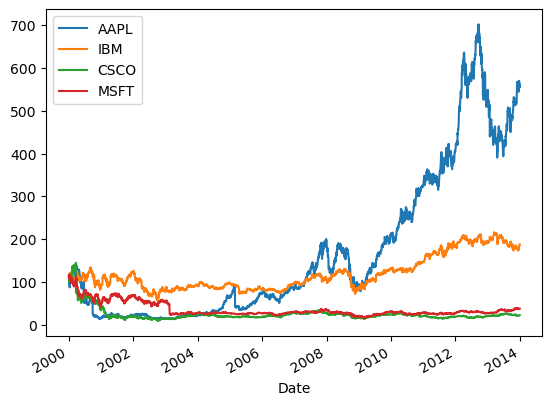

In [32]:
stocks.plot()

<Axes: xlabel='Date'>

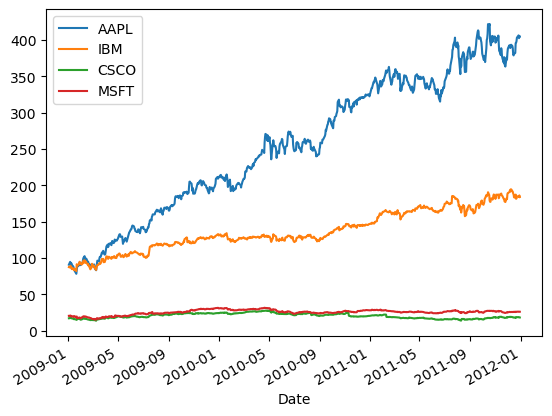

In [33]:
stocks['2009':'2011'].plot()

In [34]:
monthly_series_mean=stocks.resample("M").mean()
monthly_series_mean

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-31,103.359375,116.818750,107.590625,107.115625
2000-02-29,111.638281,113.237500,127.730469,99.300000
2000-03-31,128.502717,111.527174,117.514946,99.815217
2000-04-30,123.105263,114.154605,68.007401,79.009868
2000-05-31,100.810368,107.687500,59.800426,67.071023
...,...,...,...,...
2013-08-31,484.843635,187.125000,24.948636,32.485000
2013-09-30,480.184499,188.767000,24.080000,32.523500
2013-10-31,504.744783,180.710002,22.847391,34.382174


<Axes: xlabel='Date'>

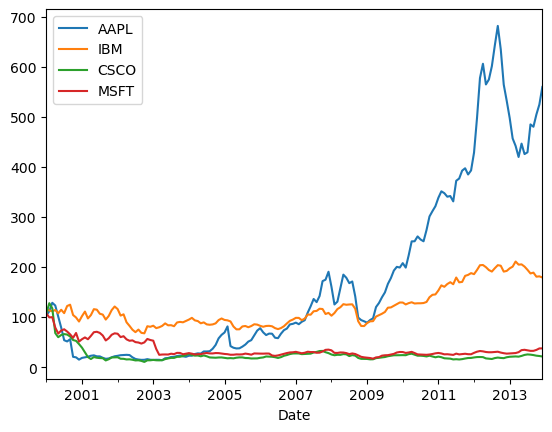

In [35]:
monthly_series_mean.plot()

<Axes: xlabel='Date'>

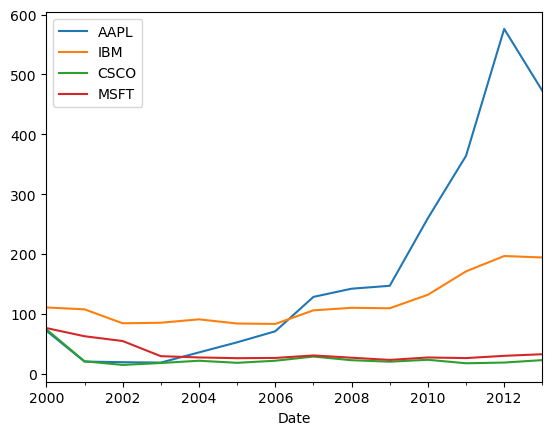

In [36]:
yearly_series_mean=stocks.resample("Y").mean()
yearly_series_mean.plot()

<Axes: xlabel='Date'>

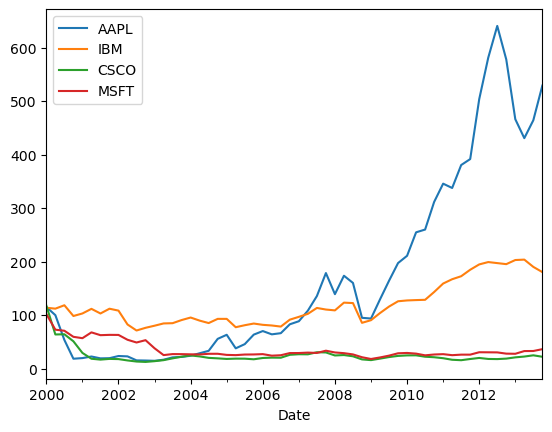

In [37]:
quarter_series_mean=stocks.resample("Q").mean()
quarter_series_mean.plot()

<Axes: xlabel='Date'>

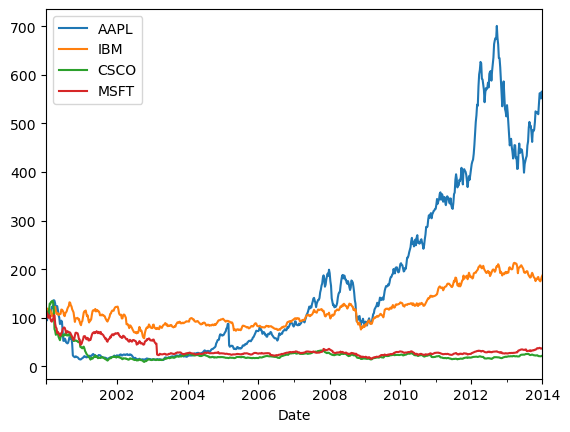

In [38]:
weekly_series_mean=stocks.resample("W").mean()
weekly_series_mean.plot()

<Axes: xlabel='Date'>

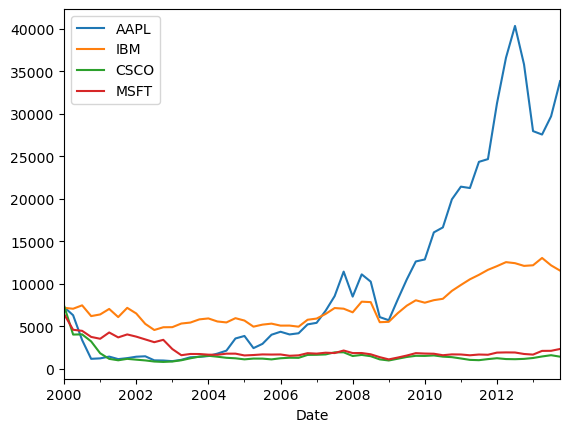

In [39]:
quarter_series_sum=stocks.resample("Q").sum()
quarter_series_sum.plot()

<Axes: xlabel='Date'>

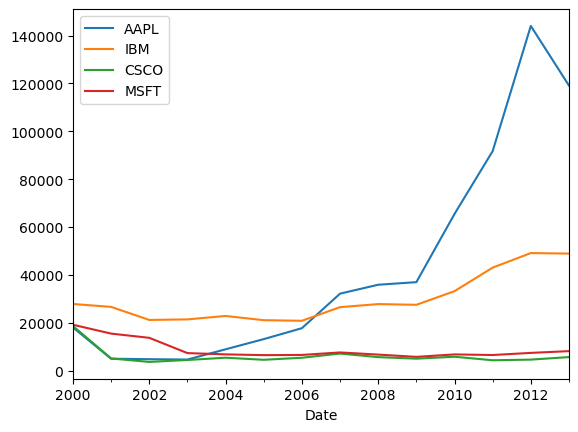

In [40]:
yearly_series_sum=stocks.resample("Y").sum()
yearly_series_sum.plot()

In [41]:
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [42]:
MSFT = stocks[["MSFT"]]
MSFT

,MSFT
Date,
2000-01-03,116.562500
2000-01-04,112.625000
2000-01-05,113.812500
2000-01-06,110.000000
2000-01-07,111.437500
...,...
2013-12-24,37.080002
2013-12-26,37.439999
2013-12-27,37.290001


In [43]:
MSFT["rolling_weekly"]=MSFT["MSFT"].rolling(window=7).mean()
MSFT["rolling_monthly"]=MSFT["MSFT"].rolling(window=30).mean()

C:\Users\thanh\AppData\Local\Temp\ipykernel_9032\4051351691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT["rolling_weekly"]=MSFT["MSFT"].rolling(window=7).mean()
C:\Users\thanh\AppData\Local\Temp\ipykernel_9032\4051351691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT["rolling_monthly"]=MSFT["MSFT"].rolling(window=30).mean()


<Axes: xlabel='Date'>

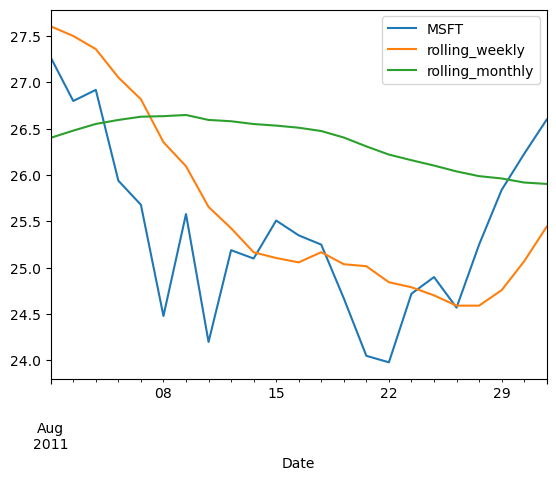

In [44]:
MSFT['Aug-2011':'Aug-2011'].plot()